<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> Install and Import Packages</h1>
    </div>
</div>

In [1]:
!pip install mplsoccer
!pip install highlight-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text
from mplsoccer import VerticalPitch, Pitch, Bumpy
import warnings
warnings.filterwarnings('ignore')

<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> Get and Prepare Data</h1>
    </div>
</div>

In [3]:
data = pd.read_csv('/kaggle/input/erling-haarland-shots/erling_haaland_2022_understat.csv')
data.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [4]:
# We have to multiply the coordinates to fit it into the pitch
data['X'] = data['X'] * 100
data['Y'] = data['Y'] * 100

In [5]:
# Calculate overall stats
total_shots = len(data)
goals = len(data[data['result'] == 'Goal'])
total_xg = data['xG'].sum().round(2)
xg_per_shot = (total_xg / total_shots).round(2)

<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> Shot Map</h1>
    </div>
</div>

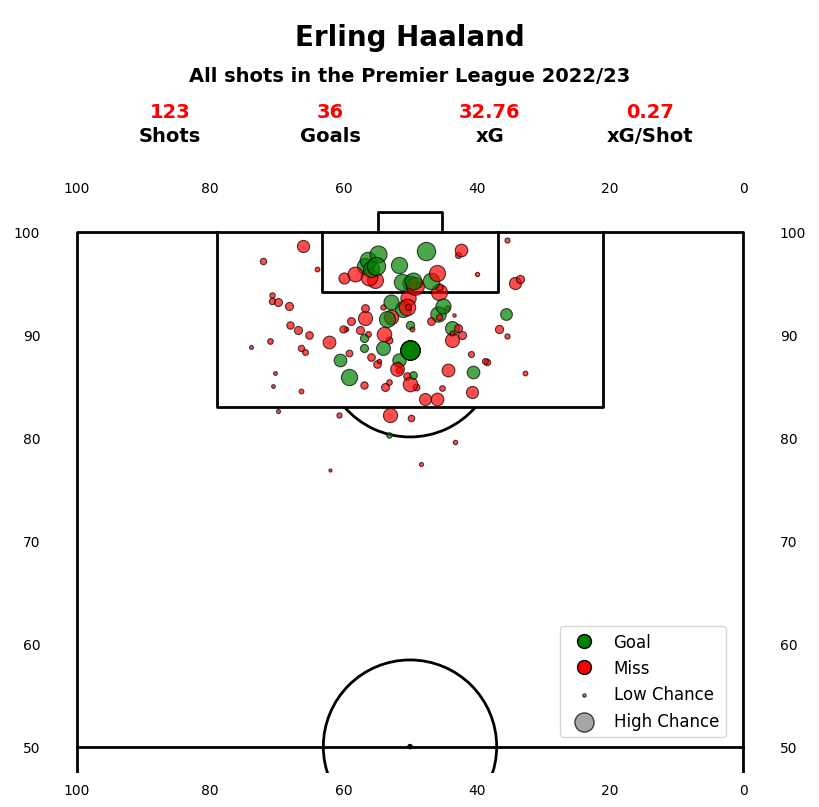

In [6]:
pitch = VerticalPitch(
    half=True,
    label=True,
    pitch_type='opta',
    goal_type='box',
    line_color='black',
)

# Create the figure and axis for the header
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Add title and subtitle
ax1.text(
    x=0.5, 
    y=.85, 
    s='Erling Haaland', 
    fontsize=20, 
    fontweight='bold', 
    color='black', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s='All shots in the Premier League 2022/23', 
    fontsize=14,
    fontweight='bold',
    color='black', 
    ha='center'
)

# Add headlines for statistic
texts = ['Shots', 'Goals', 'xG', 'xG/Shot']
x_positions = [0.2, 0.4, 0.6, 0.8]

for i, text in enumerate(texts):
    ax1.text(
        x=x_positions[i], 
        y=0.45,
        s=text, 
        fontsize=14, 
        fontweight='bold', 
        color='black', 
        ha='center'
    )
    
# Add values for statistics
texts_values = [total_shots, goals, total_xg, xg_per_shot]
for i, text in enumerate(texts_values):
    ax1.text(
        x=x_positions[i], 
        y=0.55,
        s=text, 
        fontsize=14, 
        fontweight='bold', 
        color='red', 
        ha='center'
    )

ax1.set_axis_off()

# Create the pitch area for shot locations
ax2 = fig.add_axes([.05, 0.25, .9, .5])
pitch.draw(ax=ax2)


for x in data.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=250 * x['xG'], 
        color='green' if x['result'] == 'Goal' else 'red', 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='black'
    )

# Create custom legend for Goal and Miss markers
goal_circle = plt.Line2D([0], [0], marker='o', color='w', label='Goal', 
                         markerfacecolor='green', markeredgecolor='black', markersize=10)
miss_circle = plt.Line2D([0], [0], marker='o', color='w', label='Miss', 
                         markerfacecolor='red', markeredgecolor='black', markersize=10)

# Create custom legend entries for varying bubble sizes, labeled as Low and High Chance
size_labels = ['Low Chance', 'High Chance']  # Custom labels
bubble_sizes = [data['xG'].min(), data['xG'].max()]
size_legend_handles = [plt.scatter([], [], s=250 * xG, edgecolor='black', color='grey', alpha=.7, label=label)
                       for xG, label in zip(bubble_sizes, size_labels)]

# Add the goal/miss handles and size legend handles to the legend
ax2.legend(handles=[goal_circle, miss_circle] + size_legend_handles, 
           loc='lower right', 
           bbox_to_anchor=(0.95, 0.05),  # Adjust position as needed
           fontsize=12, 
           frameon=True)

plt.show()

<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> Goals per Game</h1>
    </div>
</div>

In [7]:
player_name = "Erling Haaland"
df_player = data[(data['player'] == player_name) & (data['result'] == 'Goal')]

# Calculate goals per match
goals_per_game = df_player.groupby(['match_id']).size().reset_index(name='goals')

# Convert to dictionary format expected by the Bumpy plot
player_goals_dict = {player_name: goals_per_game.set_index('match_id')['goals'].tolist()}

# Create match days (x-axis labels)
match_day = ["Week " + str(num) for num in range(1, len(goals_per_game['match_id'].unique()) + 1)]

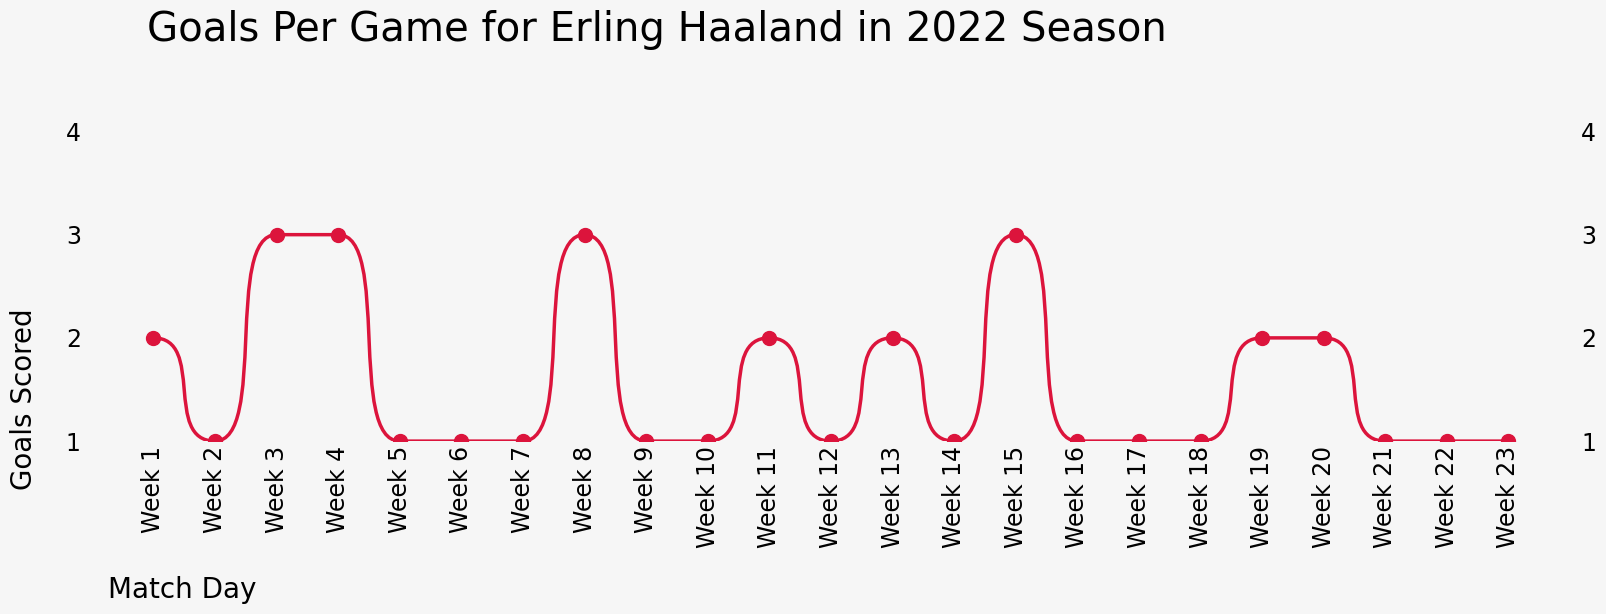

In [8]:
highlight_dict = {
    player_name: "crimson"  # Choose any color you prefer
}

# Instantiate Bumpy object
bumpy = Bumpy(
    #scatter_color="#282A2C",
    background_color="#F6F6F6",
    label_color="#000000", 
    line_color="#000000",
    rotate_xticks=90,
    ticklabel_size=17, label_size=20,
    scatter_points='D',   
    scatter_primary='o',
    show_right=True,
    plot_labels=True,
    alignment_yvalue=0.1,
    alignment_xvalue=0.065
)

# Create the bumpy plot
fig, ax = bumpy.plot(
    x_list=match_day,  # Match days as x-axis
    y_list=np.arange(0, max(player_goals_dict[player_name]) + 2),
    values=player_goals_dict,
    secondary_alpha=0.5,
    highlight_dict=highlight_dict,
    figsize=(16, 6),
    x_label='Match Day', y_label='Goals Scored',
    ylim=(max(player_goals_dict[player_name]) + 1, -0.1),
    lw=2.5,
)

# Title and Subtitle
TITLE = f"Goals Per Game for {player_name} in 2022 Season"

# Add title
fig.text(0.09, 0.95, TITLE, size=29, color="#000000")

# Final layout adjustments
plt.tight_layout(pad=0.5)
plt.show()

<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> xG Distribution</h1>
    </div>
</div>

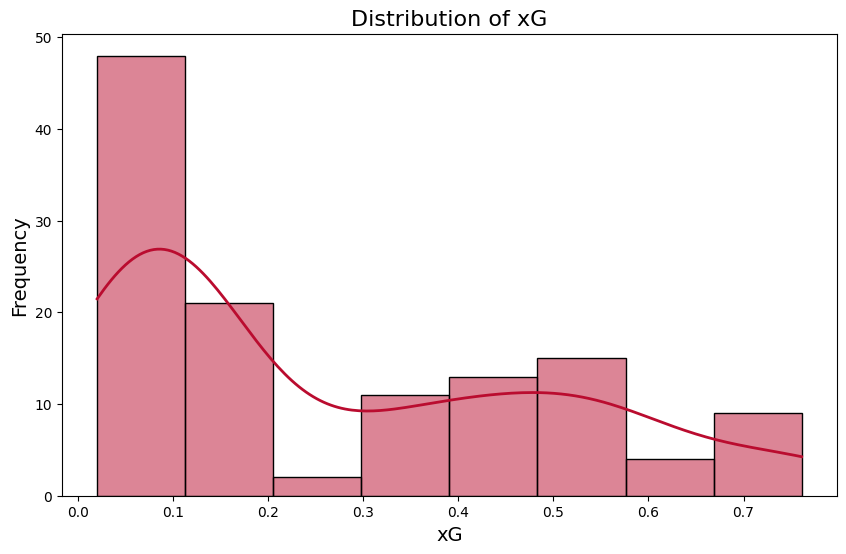

In [9]:
plt.figure(figsize=(10, 6))

# Create a histogram plot of xG with KDE curve using red and blue colors
sns.histplot(data['xG'], kde=True, color='#BA0C2F', line_kws={'color': '#00205B', 'lw': 2})

# Add title and labels
plt.title('Distribution of xG', fontsize=16)
plt.xlabel('xG', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

<div style="display: flex; align-items: center; background-color: #002868; padding: 20px; color: white; font-weight: bold;">
    <div style="background: url('https://upload.wikimedia.org/wikipedia/commons/d/d9/Flag_of_Norway.svg') no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
    </div>
    <div style="no-repeat center center; background-size: 100% 100%; width: 150px; height: 100px; margin-right: 20px;">
        <h1> Top Assist</h1>
    </div>
</div>

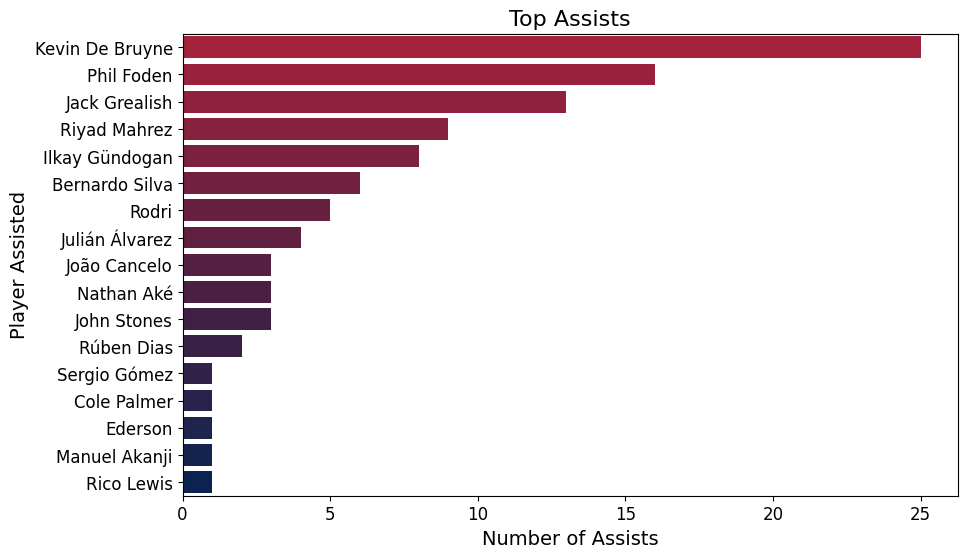

In [10]:
player_assist_counts = data['player_assisted'].value_counts().sort_values(ascending=False)

norwegian_gradient = sns.blend_palette(['#BA0C2F', '#00205B'], n_colors=len(player_assist_counts), as_cmap=False)
plt.figure(figsize=(10, 6))
sns.countplot(
    y='player_assisted',  
    data=data, 
    order=player_assist_counts.index,  
    palette=norwegian_gradient, 
    orient='h' 
)

plt.title('Top Assists', fontsize=16)
plt.xlabel('Number of Assists', fontsize=14)
plt.ylabel('Player Assisted', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()